In [353]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

In [354]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [355]:
def get_src_packets(df, src, switch):
    df_out = df.loc[df["src_addr"].isin(src)]
    df_out = df_out.loc[df["events"].isin(["+", "-"])]
    df_out = df_out.loc[df_out["from_node"].isin([switch])]
    return df_out

In [356]:
def get_src_flowid_packets(df, src, switch, flowid):
    df_out = df.loc[df["src_addr"].isin(src)]
    df_out = df_out.loc[df["events"].isin(["+", "-"])]
    df_out = df_out.loc[df_out["fid"].isin([flowid])]
    df_out = df_out.loc[df_out["from_node"].isin([switch])]
    return df_out

In [357]:
def sort_by_time(df):
    
    df = df.sort_values(by=["time", "events"])
    return df

In [358]:
def cal_queue_len(df):
    pktCount = 0
    queue_len = []
    for index, row in df.iterrows():
        if row["events"] == '-': 
            pktCount -= 1
            queue_len.append(pktCount)
        if row["events"] == '+':
            pktCount += 1
            queue_len.append(pktCount)
    df["queue_len"] = queue_len
    return df
    

In [359]:
def plot(df):
    plt.figure(figsize=(8,5))
    #plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.xlabel("Time")
    plt.ylabel("Queue Length")
    #plt.xscale('log')
    plt.title("Real Time Queue Length")
    
    line0 = plt.plot(df["time"][200:500], df["queue_len"][200:500], color='red', markersize = 12)

    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


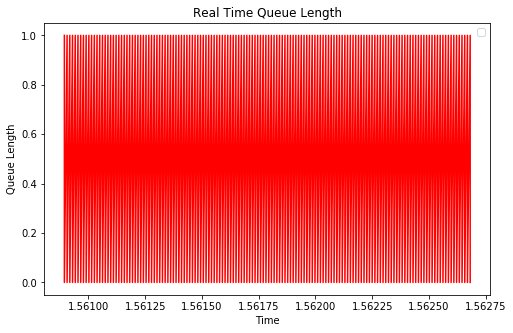

In [344]:
df_out_tr = read_out_tr('./','out.tr')

df_filtered = get_src_packets(df_out_tr, [23.0, 23.1, 23.2, 23.3], 19)

df_sort = sort_by_time(df_filtered)

df_res = cal_queue_len(df_sort)

plot(df_res)

No handles with labels found to put in legend.


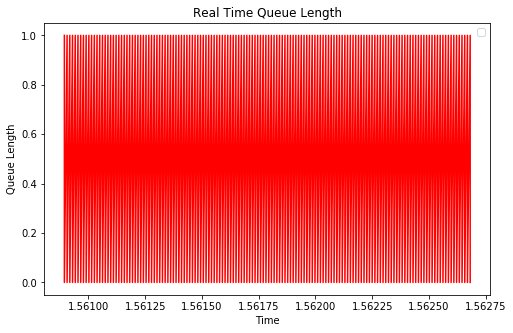

In [346]:
df_out_tr = read_out_tr('./','AFQ10_out.tr')

df_filtered = get_src_packets(df_out_tr, [23.0, 23.1, 23.2, 23.3], 19)

df_sort = sort_by_time(df_filtered)

df_res = cal_queue_len(df_sort)

plot(df_res)

No handles with labels found to put in legend.


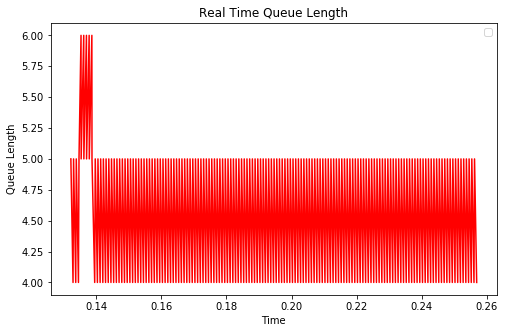

In [350]:
df_out_tr = read_out_tr('./','simple_HRCC_out.tr')

df_filtered = get_src_packets(df_out_tr, [1.0, 1.1, 1.2, 1.3], 4)

df_sort = sort_by_time(df_filtered)

df_res = cal_queue_len(df_sort)

plot(df_res)

No handles with labels found to put in legend.


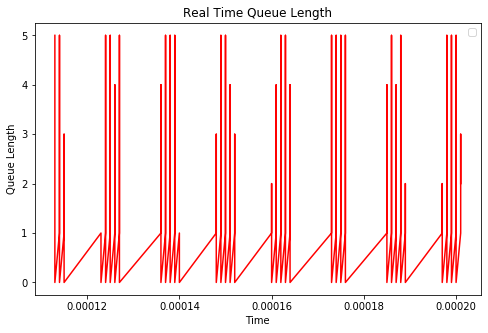

In [360]:
df_out_tr = read_out_tr('./','simple_HRCC_one_flow_out.tr')

df_filtered = get_src_packets(df_out_tr, [0.0, 0.1, 0.2, 0.3], 4)

df_sort = sort_by_time(df_filtered)

df_res = cal_queue_len(df_sort)

plot(df_res)